In [99]:
# Step 1: Data Cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
# Load the data
df = pd.read_csv(r'C:\Users\hp\Downloads\Data.csv')

In [101]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [102]:
# Clean column names
df.columns = df.columns.str.lower().str.replace('-', '_')

In [103]:
# Convert ScheduledDay to datetime64 (keeping full datetime)
df['scheduledday'] = pd.to_datetime(df['scheduledday'], errors='coerce')

# Extract the day of the week (0 = Monday, 6 = Sunday)
df['sch_weekday'] = df['scheduledday'].dt.dayofweek

# convert AppointmentDay to datetime64 
df['appointmentday'] = pd.to_datetime(df['appointmentday'], errors='coerce')


df.to_csv('Data_converted_with_weekday.csv', index=False)


print(df[['scheduledday', 'sch_weekday']].head())

               scheduledday  sch_weekday
0 2016-04-29 18:38:08+00:00            4
1 2016-04-29 16:08:27+00:00            4
2 2016-04-29 16:19:04+00:00            4
3 2016-04-29 17:29:31+00:00            4
4 2016-04-29 16:07:23+00:00            4


In [104]:
# Create new column: no_show (1 if missed, 0 if attended)
df['no_show'] = df['no_show'].map({'Yes': 1, 'No': 0})

# Remove invalid ages
df = df[df['age'] >= 0]




In [105]:
df.head(5)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,sch_weekday
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,4
1,5.589980e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,4
2,4.262960e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,4
3,8.679510e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,4
4,8.841190e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,4


In [106]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110526 non-null  float64            
 1   appointmentid   110526 non-null  int64              
 2   gender          110526 non-null  object             
 3   scheduledday    110526 non-null  datetime64[ns, UTC]
 4   appointmentday  110526 non-null  datetime64[ns, UTC]
 5   age             110526 non-null  int64              
 6   neighbourhood   110526 non-null  object             
 7   scholarship     110526 non-null  int64              
 8   hipertension    110526 non-null  int64              
 9   diabetes        110526 non-null  int64              
 10  alcoholism      110526 non-null  int64              
 11  handcap         110526 non-null  int64              
 12  sms_received    110526 non-null  int64              
 13  no_show         110

In [107]:
df = df.rename(columns={'hipertension': 'hypertension', 'handcap': 'handicap', 'sms_received': 'smsreceived', 'no_show': 'noshow'})



In [108]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'smsreceived', 'noshow',
       'sch_weekday'],
      dtype='object')

In [109]:
# Age groups
def age_group(age):
    if age < 18:
        return 'Child'
    elif age < 40:
        return 'Adult'
    elif age < 60:
        return 'Middle Age'
    else:
        return 'Senior'

df['age_group'] = df['age'].apply(age_group)

In [110]:
df.head(5)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow,sch_weekday,age_group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,4,Senior
1,5.589980e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,4,Middle Age
2,4.262960e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,4,Senior
3,8.679510e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,4,Child
4,8.841190e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,4,Middle Age


In [111]:
# Step 3: Exploratory Data Analysis (EDA)
# No-show rate
no_show_rate = df['noshow'].mean()

In [112]:
# No-show by gender
no_show_gender = df.groupby('gender')['noshow'].mean()

In [113]:
# No-show by age group
no_show_agegroup = df.groupby('age_group')['noshow'].mean()

In [114]:
# No-show by SMS
no_show_sms = df.groupby('smsreceived')['noshow'].mean()

In [115]:
# No-show by diseases
no_show_conditions = df[['hypertension', 'diabetes', 'alcoholism', 'handicap', 'noshow']].groupby(['hypertension', 'diabetes', 'alcoholism', 'handicap']).mean()


In [116]:
df.head(5)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow,sch_weekday,age_group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,4,Senior
1,5.589980e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,4,Middle Age
2,4.262960e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,4,Senior
3,8.679510e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,4,Child
4,8.841190e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,4,Middle Age


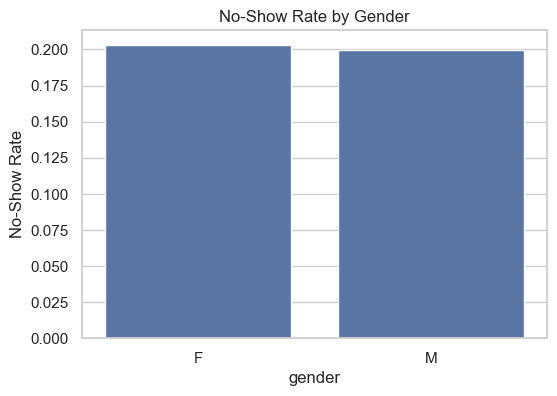

In [117]:
# Step 4: Visualizations
sns.set(style='whitegrid')

# 1. No-show by gender
plt.figure(figsize=(6, 4))
sns.barplot(x=no_show_gender.index, y=no_show_gender.values)
plt.title('No-Show Rate by Gender')
plt.ylabel('No-Show Rate')
plt.show()

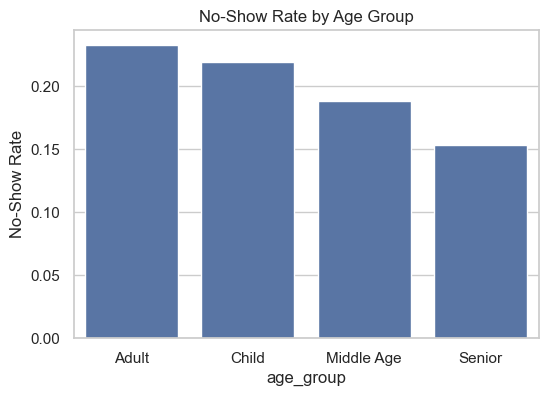

In [118]:
# 2. No-show by age group
plt.figure(figsize=(6, 4))
sns.barplot(x=no_show_agegroup.index, y=no_show_agegroup.values)
plt.title('No-Show Rate by Age Group')
plt.ylabel('No-Show Rate')
plt.show()

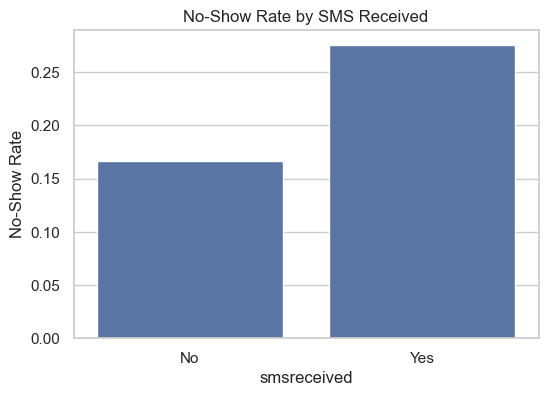

In [119]:
# 3. No-show by SMS
plt.figure(figsize=(6, 4))
sns.barplot(x=no_show_sms.index, y=no_show_sms.values)
plt.title('No-Show Rate by SMS Received')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('No-Show Rate')
plt.show()

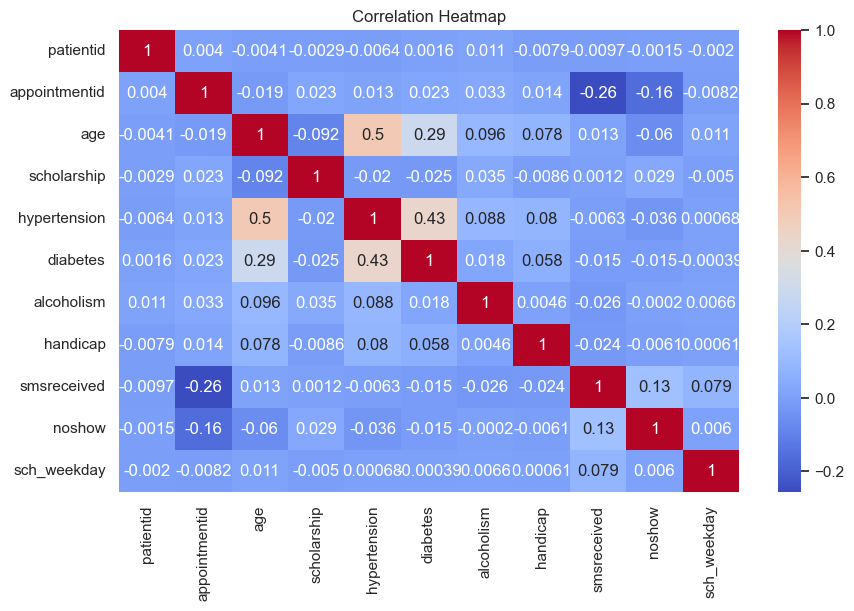

In [120]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [121]:
df.head(5)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow,sch_weekday,age_group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,4,Senior
1,5.589980e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,4,Middle Age
2,4.262960e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,4,Senior
3,8.679510e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,4,Child
4,8.841190e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,4,Middle Age


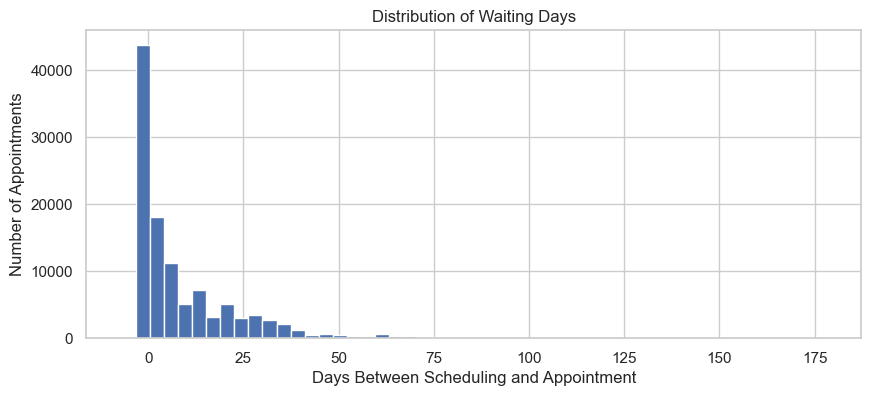

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
(df['appointmentday'] - df['scheduledday']).dt.days.hist(bins=50)
plt.title('Distribution of Waiting Days')
plt.xlabel('Days Between Scheduling and Appointment')
plt.ylabel('Number of Appointments')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_15908\931574343.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=no_show_by_day.index, y=no_show_by_day.values, palette='Set2')


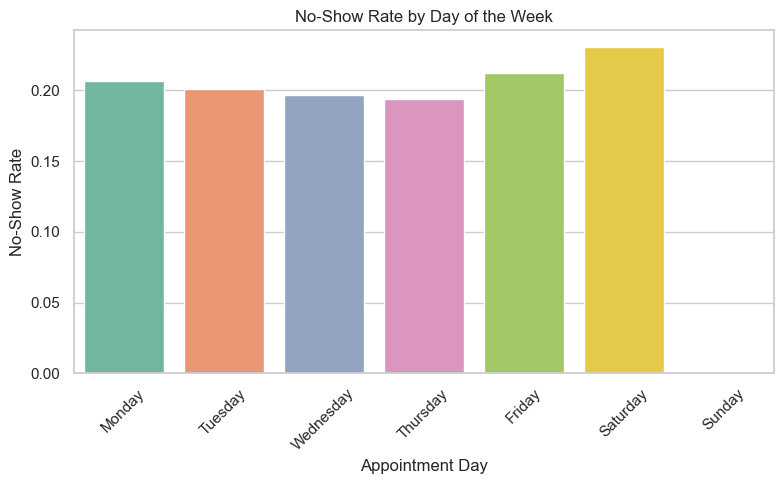

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract day of the week from appointment date
df['appointment_dayofweek'] = df['appointmentday'].dt.day_name()

# Calculate no-show rate per day
no_show_by_day = df.groupby('appointment_dayofweek')['noshow'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=no_show_by_day.index, y=no_show_by_day.values, palette='Set2')
plt.title('No-Show Rate by Day of the Week')
plt.ylabel('No-Show Rate')
plt.xlabel('Appointment Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [123]:
# Step 5: Report Insights
# - Longer waiting times may increase no-show probability
# - SMS reminders slightly reduce no-shows
# - Older patients tend to show up more
# - Females have slightly higher no-show rate

In [126]:
# Save cleaned and processed data
df.to_csv("cleaned_medical_appointments.csv", index=False)